# Pratica de series temporais com Python

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

## PARTE I - Explorando dados

In [2]:
url = 'https://raw.githubusercontent.com/sylviewn/Time-Series-Analysis/main/AirPassengers.csv'
df = pd.read_csv(url)
df.shape, df.dtypes,df.head()

((144, 2),
 Month          object
 #Passengers     int64
 dtype: object,
      Month  #Passengers
 0  1949-01          112
 1  1949-02          118
 2  1949-03          132
 3  1949-04          129
 4  1949-05          121)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
df = pd.read_csv(url, parse_dates= ['Month'], index_col='Month')
df.index = pd.to_datetime(df.index, format='%Y-%m')
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [6]:
ts = df['#Passengers']
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [7]:
ts.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [8]:
ts.index.min(), ts.index.max()

(Timestamp('1949-01-01 00:00:00'), Timestamp('1960-12-01 00:00:00'))

In [9]:
ts.iloc[0], ts.iloc[-1]

(112, 432)

In [10]:
ts['1949-02']

Month
1949-02-01    118
Name: #Passengers, dtype: int64

In [11]:
ts[datetime(1949,2,1)]

118

In [12]:
ts['1950-01-01':'1950-07-31']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [13]:
ts[: '1950-07-31']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [14]:
ts['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

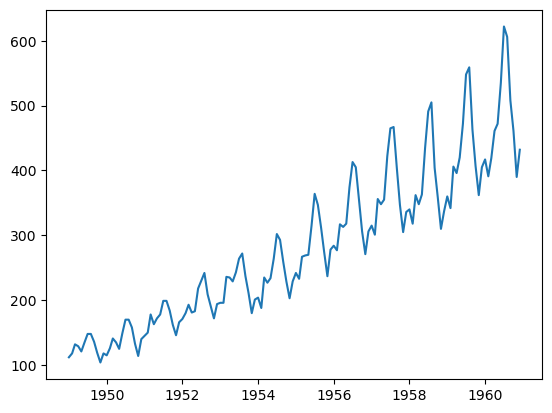

In [15]:
plt.plot(ts)

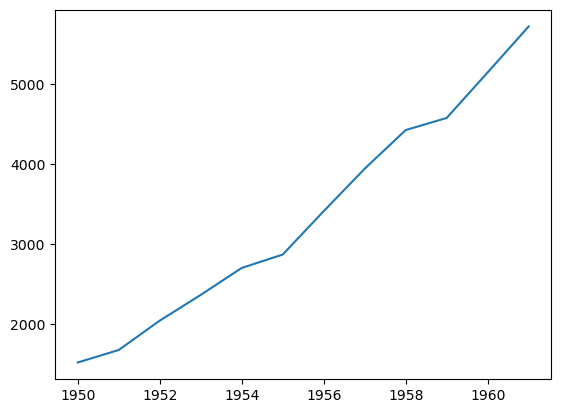

In [16]:
ts_ano = ts.resample('YE').sum()
plt.plot(ts_ano)

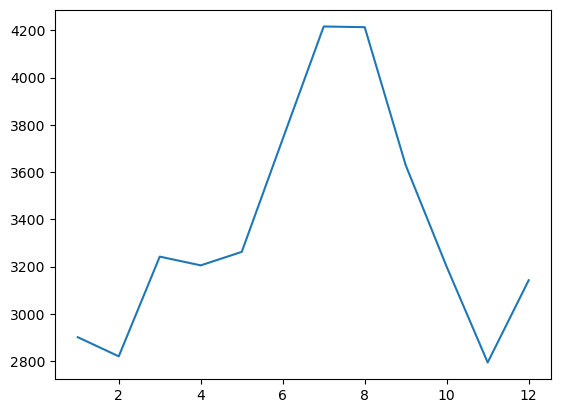

In [17]:
ts_mes = ts.groupby([lambda x: x.month]).sum()
plt.plot(ts_mes)

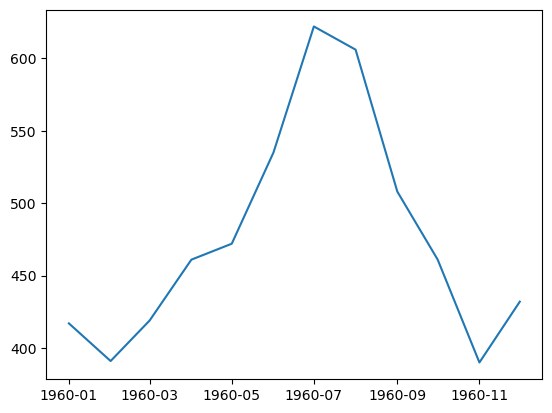

In [18]:
ts_datas = ts['1960-01-01':'1960-12-01']
plt.plot(ts_datas)

## PARTE II - Decomposição

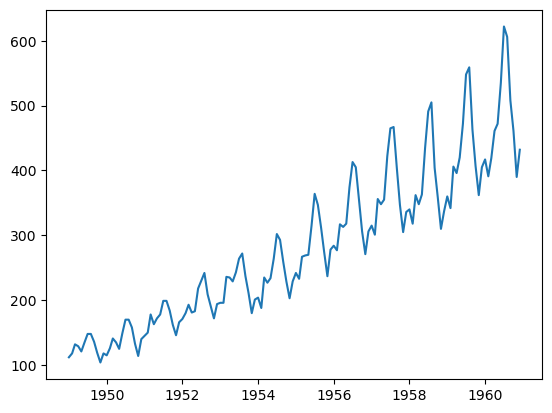

In [21]:
plt.plot(ts)

In [22]:
decomposicao = seasonal_decompose(ts)
decomposicao

In [23]:
decomposicao.trend

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [24]:
decomposicao.seasonal

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

In [35]:
decomposicao.resid

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

<Axes: xlabel='Month'>

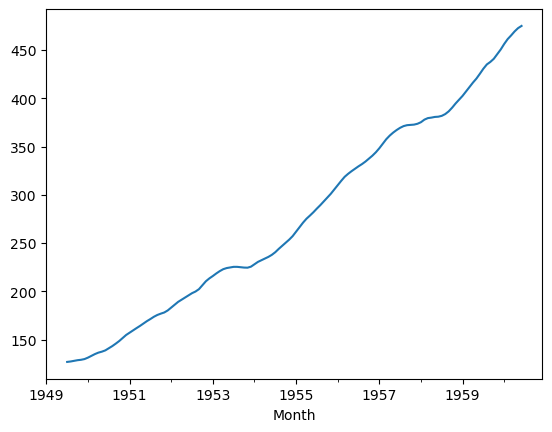

In [36]:
decomposicao.trend.plot()

<Axes: xlabel='Month'>

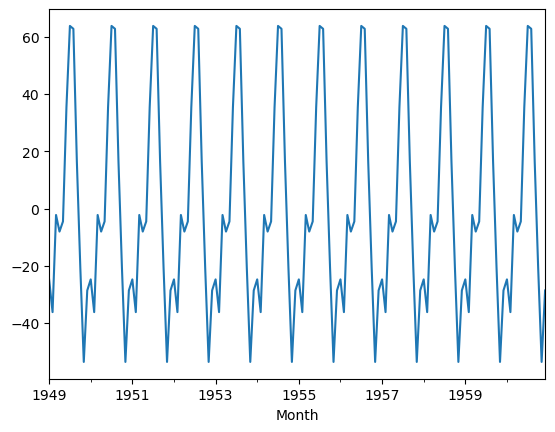

In [37]:
decomposicao.seasonal.plot()

<Axes: xlabel='Month'>

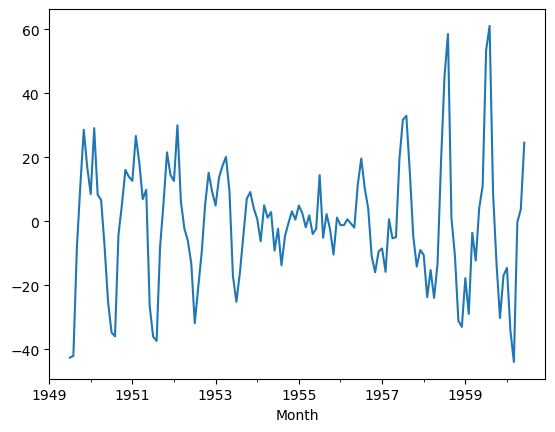

In [38]:
decomposicao.resid.plot()

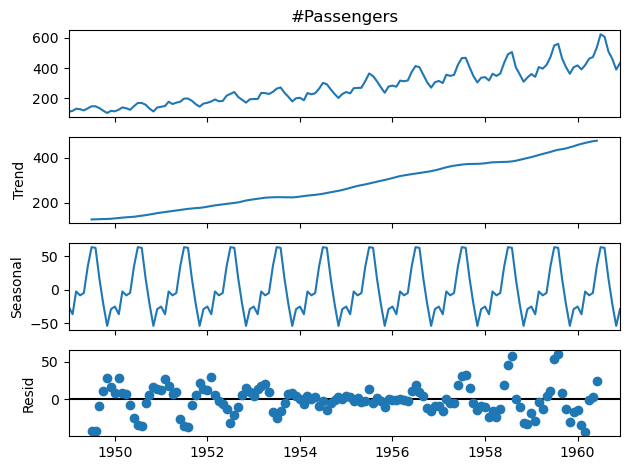

In [41]:
decomposicao.plot()
plt.show()

## PARTE III - Previsões com ARIMA

In [54]:
modelo = auto_arima(
    df,
    start_p=1,
    start_q=1,
    start_d=0,
    start_P=0,
    max_p=6,
    max_q=6,
    m=12,
    seasonal=True,
    trace=True,
    stepwise=False
)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1030.752, Time=0.05 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1032.276, Time=0.11 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1030.408, Time=0.03 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.09 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1034.096, Time=0.17 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.06 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.51 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=0.59 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1020.639, Time=0.02 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.05 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1019.494, Time=0.13 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1020.327, Time=0.13 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1012.991, Time=0.38 sec
 ARIM

In [55]:
modelo.aic()

1012.9907964686814

In [56]:
train = df.loc['1949-01-01':'1959-12-01']
test = df.loc['1960-01-01':]

In [57]:
train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-08-01,559
1959-09-01,463
1959-10-01,407


In [58]:
test

,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


In [59]:
modelo.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [60]:
previsao = modelo.predict(n_periods=12)
previsao

1960-01-01    420.236917
1960-02-01    398.453103
1960-03-01    461.902733
1960-04-01    450.681747
1960-05-01    474.000358
1960-06-01    537.915271
1960-07-01    612.238910
1960-08-01    623.601531
1960-09-01    520.164954
1960-10-01    462.314699
1960-11-01    412.926541
1960-12-01    453.744348
Freq: MS, dtype: float64

<Axes: xlabel='Month'>

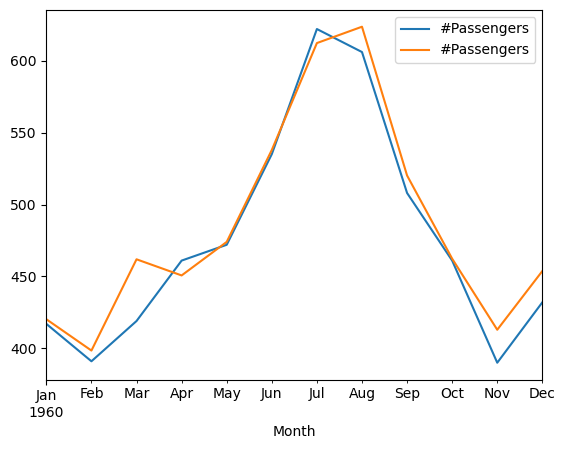

In [61]:
pd.concat(
    [
        test,
        pd.DataFrame(previsao, index=test.index, columns=["#Passengers"])
    ],
    axis=1
).plot()

<Axes: xlabel='Month'>

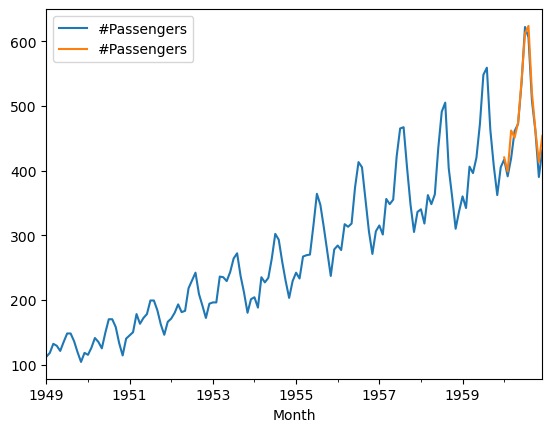

In [62]:
pd.concat(
    [
        df,
        pd.DataFrame(previsao, index=test.index, columns=["#Passengers"])
    ],
    axis=1
).plot()